In [1]:
import os, pathlib, shutil
import zipfile
from dataclasses import dataclass
import matplotlib.pyplot as plt 
from PIL import Image

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
os.listdir()

['archive.zip', 'flower_images', 'kaggle_flowers_dataset.ipynb']

In [5]:
# extract 

def unzip_file(zip_file=None):

    try: 
        with zipfile.ZipFile(zip_file) as z:
            z.extractall('./')
        print("File Extracted.")

    except:
        print('File not found.')


# unzip_file(zip_file='archive.zip')

In [2]:
@dataclass
class DataConfig:
    ROOT_DIR: str = r'C:\Users\Khemra\Desktop\OpenCV\Kaggle Flowers Project\flower_images'
    BATCH_SIZE: int = 32

In [7]:
# List directory structure 

def list_dir_structure(root_dir):

    for root, _, file in os.walk(root_dir):
        level = root.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root):<8}')

list_dir_structure(DataConfig.ROOT_DIR)

flower_images
    Lilly   
    Lotus   
    Orchid  
    Sunflower
    Tulip   


In [8]:
# show how many images in each class 

def num_of_images(root_dir):

    num_of_images = 0 

    for path in os.listdir(root_dir):
        num_of_images += len(os.listdir(os.path.join(root_dir, path)))

    print(f'Number of images: {num_of_images}')

num_of_images(DataConfig.ROOT_DIR)

Number of images: 5000


### Need to split these into Train, Test, and Valid folders. 

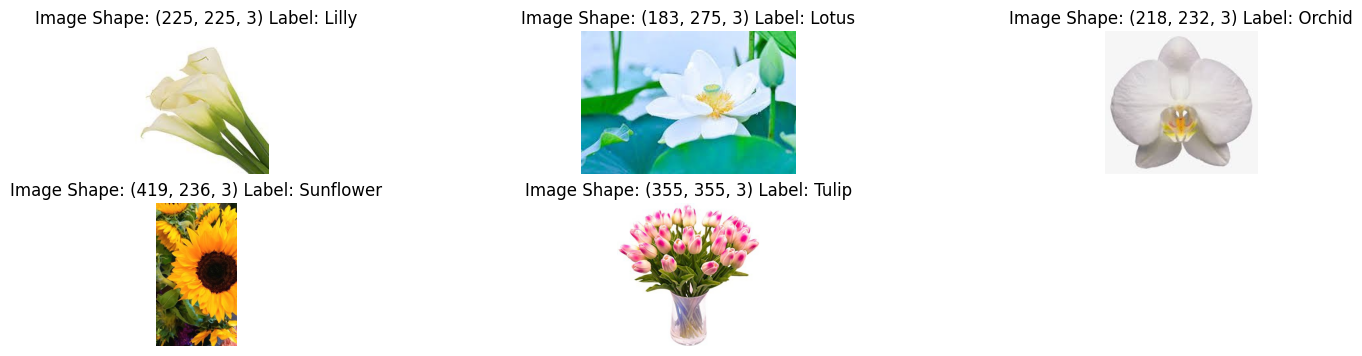

In [9]:
# display a few images with their labels in a grid 

def display_dataset_grid(data_dir):

    class_names = os.listdir(data_dir)
    plt.figure(figsize=(18, 13))

    for idx, class_names in enumerate(class_names):

        ax = plt.subplot(6, 3, idx + 1)
        image_tensor = tf.keras.utils.img_to_array(Image.open(os.path.join(data_dir, class_names, os.listdir(os.path.join(data_dir, class_names))[0])))
        image_shape = image_tensor.shape
        plt.imshow(Image.open(os.path.join(data_dir, class_names, os.listdir(os.path.join(data_dir, class_names))[0])))
        plt.title(label='Image Shape: {}'.format(image_shape) + ' Label: {}'.format(class_names))
        plt.axis('off')

display_dataset_grid(DataConfig.ROOT_DIR)

Code below works. Takes first 10 images from each class folder and copies over to the new directory. 
* Need to be able to specify a range of images to be able to split. 
* 800 in each class folder and 500 for Validation, and 500 for Test. 

In [10]:
new_base_dir = pathlib.Path('flowers_datasets')
original_path = pathlib.Path('flower_images') 

def make_subset(subset_name, start_num, end_num):
    for category in ('Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        # file_count = 0
        for file_name in os.listdir(original_path / category)[start_num:end_num]:
            if file_name.endswith('.jpg'): #and file_count < num_of_images:
                src_file = original_path / category / file_name
                dst_subdir = new_base_dir / subset_name / category 
                dst_file = dst_subdir / file_name
                shutil.copy(src_file, dst_file)
                # file_count += 1
                # if file_count >= num_of_images:
                #     break


        

make_subset("Train", start_num=1, end_num=2)
# make_subset("Valid", start_num=, end_num=)
# make_subset("Test", start_num=1, end_num=2)

In [11]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

print('Training Images: ')
train_dataset = data_augmentation.flow_from_directory(
    original_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

print('Testing Images: ')
test_dataset = data_augmentation.flow_from_directory(
    original_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

Training Images: 
Found 4000 images belonging to 5 classes.
Testing Images: 
Found 1000 images belonging to 5 classes.


In [5]:
os.listdir()[:2]

['archive.zip', 'flowers_datasets']